In [1]:
#Demonstrate non uniform sampling using the inverse cdf
import jax
import jax.numpy as jnp
import jax.scipy as jsp
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rcParams['font.size'] = 12
%matplotlib widget

key = jax.random.PRNGKey(1978)
bins = 50
nsamples = 5000
x = jax.random.uniform(key, shape=(nsamples, ))
x = np.array(x)

def hist(x, bins=bins, title=''):
    plt.close()
    plt.title(title)
    plt.hist(x, bins=bins)

/opt/homebrew/lib/python3.10/site-packages/jax/_src/lib/__init__.py:34: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


ModuleNotFoundError: No module named 'ipympl'

In [ ]:
plt.plot(x)
plt.show()

In [ ]:
hist(x, title='Uniform')

In [ ]:
hist(np.array(jsp.stats.norm.ppf(x)), title='Norm')

In [ ]:
plt.close()
plt.hist(np.array(sp.stats.beta.ppf(x, 10, 1)))
plt.hist(np.array(sp.stats.beta.ppf(x, 1, 10)))
plt.title('Beta')
plt.show()

In [2]:
def plot_poisson(lam1, lam2, lam3, lam4, alpha1, alpha2, alpha3, alpha4, bins=25, close=True):
    if close:
        plt.close()
    lambda_ = 15
    alpha = 0.5
    plt.close()
    plt.hist(np.array(sp.stats.poisson.ppf(x, lam1)), alpha=alpha1, bins=bins, label=f'lambda={lam1}')
    plt.hist(np.array(sp.stats.poisson.ppf(x, lam2)), alpha=alpha2, bins=bins, label=f'lambda={lam2}')
    plt.hist(np.array(sp.stats.poisson.ppf(x, lam3)), alpha=alpha3, bins=bins, label=f'lambda={lam3}')
    plt.hist(np.array(sp.stats.poisson.ppf(x, lam4)), alpha=alpha4, bins=bins, label=f'lambda={lam4}')
    plt.title(f'Poisson')
    plt.xlabel('x')
    plt.ylabel('pmf')
    plt.legend()
    plt.show()
plot_poisson(1, 5, 10, 25, 0.75, 0.5, 0.5, 0.5, bins=10)

NameError: name 'x' is not defined

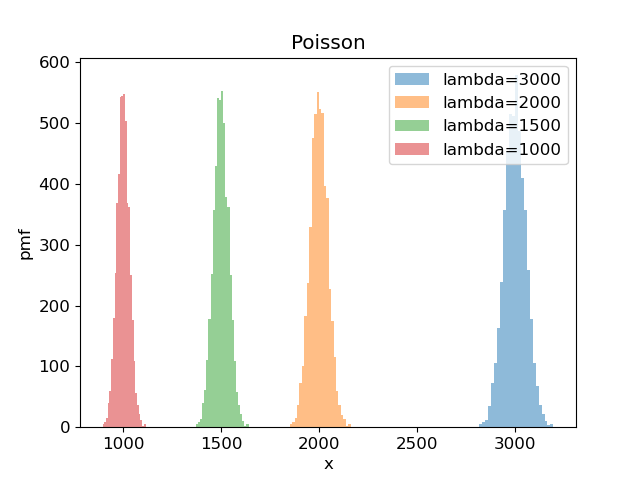

In [62]:
plot_poisson(3000, 2000, 1500, 1000, 0.5, 0.5, 0.5, 0.5)

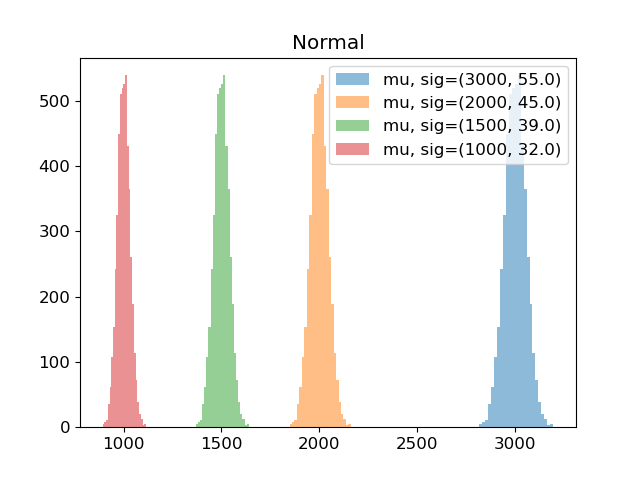

In [70]:
def plot_normal(mus, sigs, alphas, bins=25, close=True):
    if close:
        plt.close()
    m1, m2, m3, m4 = mus
    s1, s2, s3, s4 = sigs
    a1, a2, a3, a4 = alphas
    plt.title('Normal')
    plt.hist(np.array(jsp.stats.norm.ppf(x)) * s1 + m1, alpha=a1, bins=bins, label=f'mu, sig={m1, s1}')
    plt.hist(np.array(jsp.stats.norm.ppf(x)) * s2 + m2, alpha=a1, bins=bins, label=f'mu, sig={m2, s2}')
    plt.hist(np.array(jsp.stats.norm.ppf(x)) * s3 + m3, alpha=a1, bins=bins, label=f'mu, sig={m3, s3}')
    plt.hist(np.array(jsp.stats.norm.ppf(x)) * s4 + m4, alpha=a1, bins=bins, label=f'mu, sig={m4, s4}')
    plt.legend()
    plt.show()

mus = np.array([3000, 2000, 1500, 1000])
sigs = np.sqrt(mus)
sigs = np.round(sigs)
alphas = np.array([1, 1, 1, 1]) * 0.5
plot_normal(mus, sigs, alphas)

In [131]:
def compare_normal_distributions(key, mus, nsamples):
    stat = []
    pval = []
    for mu in mus:
        k1, k2, key = jax.random.split(key, 3)
        d1 = jax.random.normal(k1, shape=(nsamples, ))
        d2 = jax.random.normal(k2, shape=(nsamples, ))
        d1 = np.array(d1) * np.sqrt(mu) + mu
        d2 = np.array(d2) * np.sqrt(mu) + mu
        s, p = sp.stats.kstest(d1, d2)
        stat.append(s)
        pval.append(p)
    return stat, pval

In [215]:
def plot_ks(mus, stat, pval, title='', xlog=True):
    llog10mu = np.round(np.log10(mus), 2)
    mus = np.round(mus, 2)
    stat = np.round(stat, 2)
    #pval = np.round(pval, 2)
    nlog10pval = -np.round(np.log10(pval), 2)
    plt.close()
    plt.title(title)
    if xlog:
        plt.scatter(llog10mu, stat, label='ks-stat')
        plt.scatter(llog10mu, nlog10pval, label='-log10 p-value')
        plt.xlabel('log10 mu')
    else:
        plt.scatter(mus, stat, label='ks-stat')
        plt.scatter(mus, nlog10pval, label='-log10 p-value')
        plt.xlabel('mu')
    plt.legend()
    plt.show()
    if xlog:
        muval = llog10mu
    else:
        muval = mus
    d = pd.DataFrame([stat, nlog10pval], columns=muval, index=['stat', '-log10 p'])
    print(d)

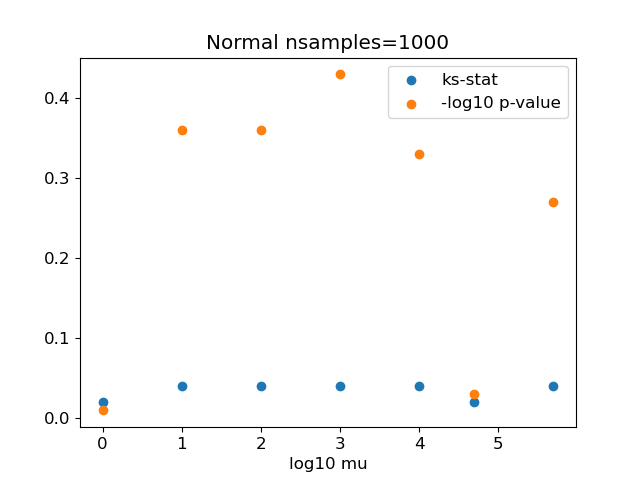

           0.0   1.0   2.0   3.0   4.0   4.7   5.7
stat      0.02  0.04  0.04  0.04  0.04  0.02  0.04
-log10 p  0.01  0.36  0.36  0.43  0.33  0.03  0.27


In [219]:

mus = [1, 10, 100, 1000, 10000, 50000, 500000]

stat, pval = compare_normal_distributions(key, mus, 1000)   

plot_ks(mus, stat, pval, title='Normal nsamples=1000', xlog=True)

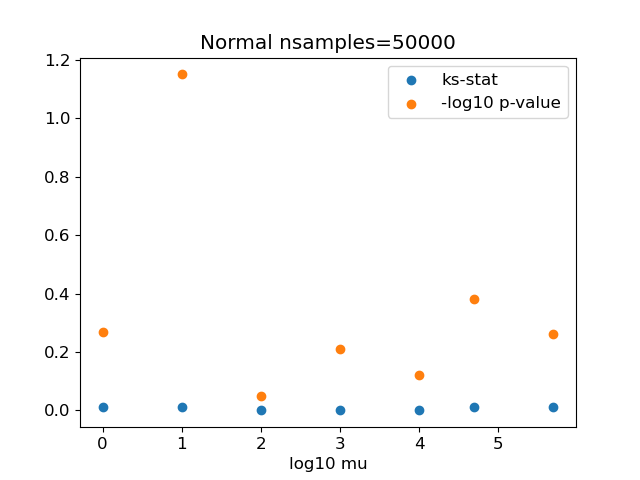

           0.0   1.0   2.0   3.0   4.0   4.7   5.7
stat      0.01  0.01  0.00  0.00  0.00  0.01  0.01
-log10 p  0.27  1.15  0.05  0.21  0.12  0.38  0.26


In [204]:
mus = [1, 10, 100, 1000, 10000, 50000, 500000]
nsamples = 50000
stat, pval = compare_normal_distributions(key, mus, nsamples)   
plot_ks(mus, stat, pval, title=f'Normal nsamples={nsamples}')

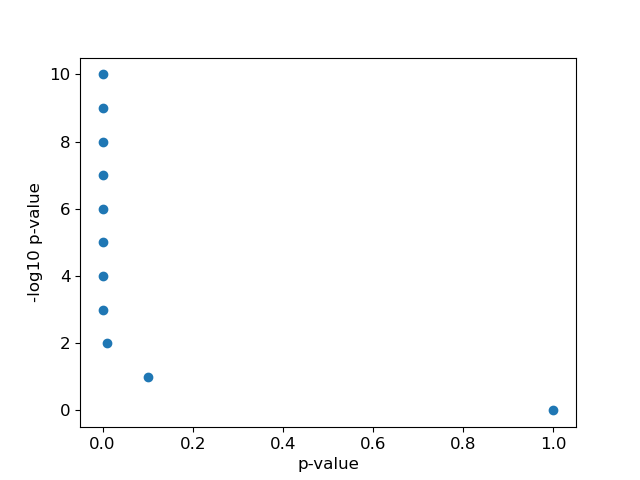

In [202]:
plt.close()
x = list(range(-10, 1, 1))
x = [10. ** i for i in x]
plt.scatter(x, -np.log10(x))
plt.xlabel('p-value')
plt.ylabel('-log10 p-value')
plt.show()

In [212]:
def compare_normal_to_poisson_distributions(key, mus, nsamples):
    stat = []
    pval = []
    for mu in mus:
        k1, k2, key = jax.random.split(key, 3)
        d1 = jax.random.normal(k1, shape=(nsamples, ))
        d2 = jax.random.poisson(k2, mu, shape=(nsamples, ))
        d1 = np.array(d1) * np.sqrt(mu) + mu
        s, p = sp.stats.kstest(d1, d2)
        stat.append(s)
        pval.append(p)
    return stat, pval

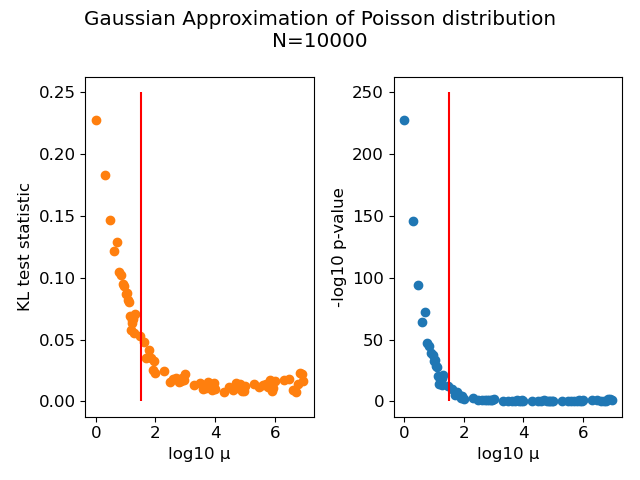

In [285]:
# a high pvalue indicate that we cannot reject the null that the two distributions are the same
mus = list(range(1, 20, 1)) + list(range(20, 100, 10)) + list(range(100, 1000, 100)) + list(range(1000, 10000, 1000))
mus = mus + list(range(int(1e4), int(1e5), int(1e4)))
mus = mus + list(range(int(1e5), int(1e6), int(1e5)))
mus = mus + list(range(int(1e6), int(1e7), int(1e6)))

nsamples = 10000
thresh = 1.5
thresh_col = 'r'
thresh_thickness = 2
stat, pval = compare_normal_to_poisson_distributions(key, mus, nsamples)   
#plot_ks(mus, stat, pval, xlog=False)
plt.close()
plt.subplot(121)
plt.suptitle(f'Gaussian Approximation of Poisson distribution\nN={nsamples}')
plt.scatter(np.log10(mus), stat, color='C1')
plt.ylabel('KL test statistic')
plt.xlabel(u'log10 \u03BC')
plt.vlines(thresh, 0, 0.25, color=thresh_col)
plt.subplot(122)
plt.scatter(np.log10(mus), -np.log10(pval), color='C0')
plt.xlabel(u'log10 \u03BC')
plt.ylabel('-log10 p-value')
plt.vlines(thresh, 0, 250,  color=thresh_col)
plt.tight_layout()
plt.show()

In [284]:
# Fit an exponenttial function to the KL-divergence with a parameter
# Interpolate between the gaussian and poisson
#Take every prey and determine it mean and variance

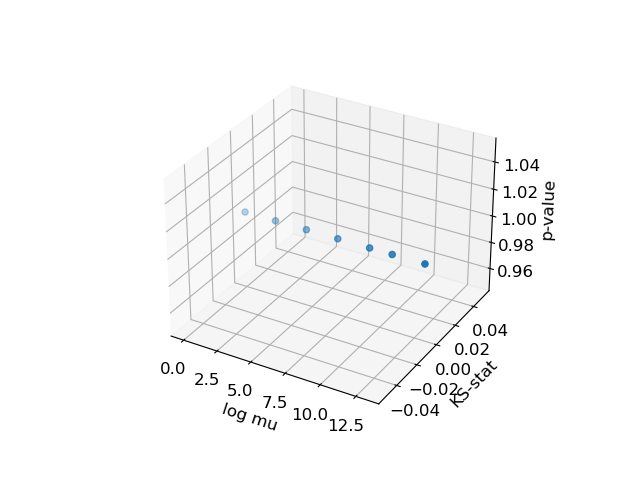

In [124]:
def plot_3d(x, y, z):
    plt.close()
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x, y, z)
    ax.set_zlabel('p-value')
    ax.set_xlabel('log mu')
    ax.set_ylabel('KS-stat')
    plt.show()
    
plot_3d(np.log(mus), stat, pval)

In [ ]:
# Fixing random state for reproducibility

def threed_plot(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    n = 100

    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
        xs = randrange(n, 23, 32)
        ys = randrange(n, 0, 100)
        zs = randrange(n, zlow, zhigh)
        ax.scatter(xs, ys, zs, marker=m)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

In [106]:
def compare_normal_distributions(key, mus, nsamples):
    stat = []
    pval = []
    for mu in mus:
        k1, k2, key = jax.random.split(key, 3)
        d1 = jax.random.normal(k1, shape=(nsamples, ))
        d2 = jax.random.normal(k1, shape=(nsamples, ))
        d1 = np.array(d1) * np.sqrt(mu) + mu
        d2 = np.array(d2) * np.sqrt(mu) + mu
        s, p = sp.stats.kstest(d1, d2)
        stat.append(s)
        pval.append(p)
    return stat, pval

[1.0, 1.0, 1.0]

In [ ]:
# Additional example cell